In [1]:
# !pip install numpy==1.24.2
# !pip install seaborn==0.12.2
# !pip install pandas==1.5.3
# !pip install scikit-learn==1.2.1

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import opendatasets as od

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 7)

In [2]:
od.download("https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction")

Skipping, found downloaded files in ".\airline-passenger-satisfaction" (use force=True to force download)


In [3]:
df = pd.read_csv('airline-passenger-satisfaction/train.csv')

In [4]:
df.head(n=10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [5]:
df.columns.tolist()

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [6]:
if df.columns[0] != 'id':
    df.drop(df.columns[0], axis=1,inplace=True)

In [7]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Analiza wartości atrybutów

In [13]:
for col in df.columns:
    if col != 'id':  # pomijaj atrybut 'id'
        unique_values = df[col].unique()
        print(f"Atrybut: {col}:")
        print(unique_values)
        for value in unique_values:
            if pd.isnull(value):
                print(f"\nDla atrybutu {col} wystepuje brak wartosci! Sprawdz!")
                # for index, value in df[col].iteritems():
                #     if pd.isna(value):
                #         print(f"Wartość w wierszu {index} jest NaN")
                #     elif value is None:
                #         print(f"Wartość w wierszu {index} jest None")
                #     elif pd.api.types.is_numeric_dtype(df[col]) and not np.isfinite(value):
                #         print(f"Wartość w wierszu {index} jest NaN, Inf lub -Inf")
        print("\n")

Atrybut: Gender:
['Male' 'Female']


Atrybut: Customer Type:
['Loyal Customer' 'disloyal Customer']


Atrybut: Age:
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]


Atrybut: Type of Travel:
['Personal Travel' 'Business travel']


Atrybut: Class:
['Eco Plus' 'Business' 'Eco']


Atrybut: Flight Distance:
[ 460  235 1142 ...  974 1479  400]


Atrybut: Inflight wifi service:
[3 2 4 1 5 0]


Atrybut: Departure/Arrival time convenient:
[4 2 5 3 1 0]


Atrybut: Ease of Online booking:
[3 2 5 4 1 0]


Atrybut: Gate location:
[1 3 2 5 4 0]


Atrybut: Food and drink:
[5 1 2 4 3 0]


Atrybut: Online boarding:
[3 5 2 1 4 0]


Atrybut: Seat comfort:
[5 1 2 3 4 0]


Atrybut: Inflight entertainment:
[5 1 2 3 4 0]


Atrybut: On-board service:
[4 1 2 3 5 0]


Atrybut: Leg room service:
[3 5 4 2 1 0]


Atrybut: Baggage hand

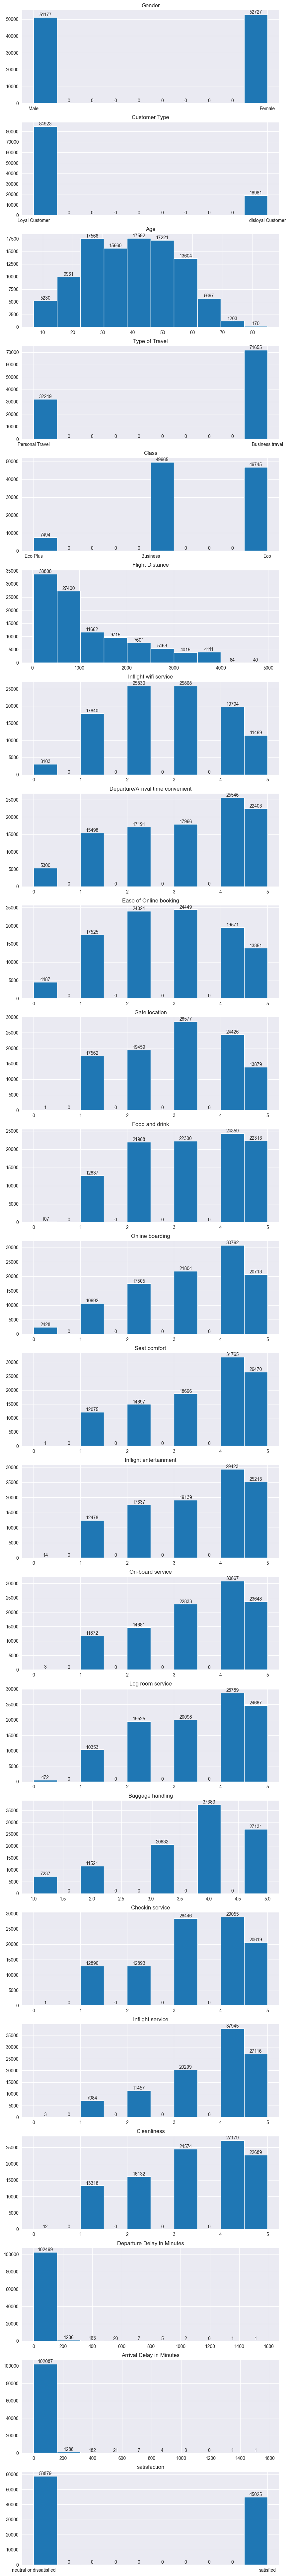

In [9]:
# utwórz subploty dla każdego atrybutu
df_hist = df.copy()
df_hist.drop(columns=['id'], inplace=True)
fig, axs = plt.subplots(nrows=len(df_hist.columns), figsize=(10, 100))

# pętla po kolumnach ramki danych
for i, col in enumerate(df_hist.columns):
   if col != 'id':  # pomijaj atrybut 'id'
        axs[i].hist(df_hist[col])
        # ustaw tytuł subplotu na nazwę kolumny
        axs[i].set_title(col)
        # dodaj wartości na każdym słupku
        for rect in axs[i].patches:
            height = rect.get_height()
            axs[i].text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

In [19]:
df1 = df.copy()

In [25]:
df1['Arrival Delay in Minutes'] = df1['Arrival Delay in Minutes'].mask(df1['Arrival Delay in Minutes'] < 0, None)
df1['Departure Delay in Minutes'] = df1['Departure Delay in Minutes'].mask(df1['Departure Delay in Minutes'] < 0, None)

In [22]:
df1.loc[df1['Arrival Delay in Minutes'].isna(), :]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [26]:
df1.loc[df1['Departure Delay in Minutes'].isna(), :]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


## Imputacja danych

Udało się zidentyfikować wartości brakujące w naszej ramce danych, które należy uzupełnić. W przypadku naszych danych możemy założyć, że braki nie niosą ze sobą żadnej istotnej informacji (MCAR - Missing completely at random). Dlatego możemy je uzupełnić wartością średnią.

Rodzaje braków danych opisano: displayr.com/different-types-of-missing-data/

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
arriv_delay_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1['Arrival Delay in Minutes'] = arriv_delay_imputer.fit_transform(df[['Arrival Delay in Minutes']])

In [32]:
df1.loc[69607]

id                                                     22007
Gender                                                  Male
Customer Type                                 Loyal Customer
Age                                                       36
Type of Travel                               Personal Travel
Class                                                    Eco
Flight Distance                                          503
Inflight wifi service                                      2
Departure/Arrival time convenient                          5
Ease of Online booking                                     4
Gate location                                              4
Food and drink                                             5
Online boarding                                            4
Seat comfort                                               5
Inflight entertainment                                     5
On-board service                                           4
Leg room service        

In [33]:
df1.loc[34727]

id                                            115310
Gender                                          Male
Customer Type                         Loyal Customer
Age                                               47
Type of Travel                       Business travel
Class                                       Business
Flight Distance                                  337
Inflight wifi service                              0
Departure/Arrival time convenient                  0
Ease of Online booking                             0
Gate location                                      2
Food and drink                                     3
Online boarding                                    4
Seat comfort                                       5
Inflight entertainment                             3
On-board service                                   3
Leg room service                                   3
Baggage handling                                   3
Checkin service                               

## Szukanie outlierów








<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

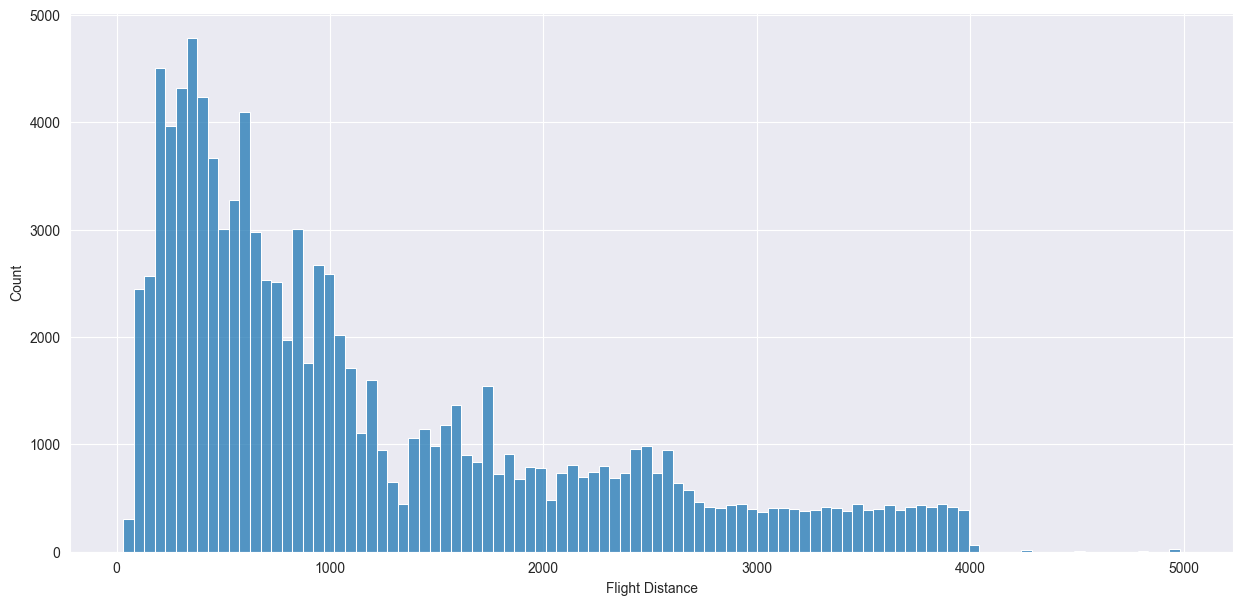

In [34]:
sns.histplot(data=df, x='Flight Distance', bins=100)

<AxesSubplot:xlabel='Age', ylabel='Count'>

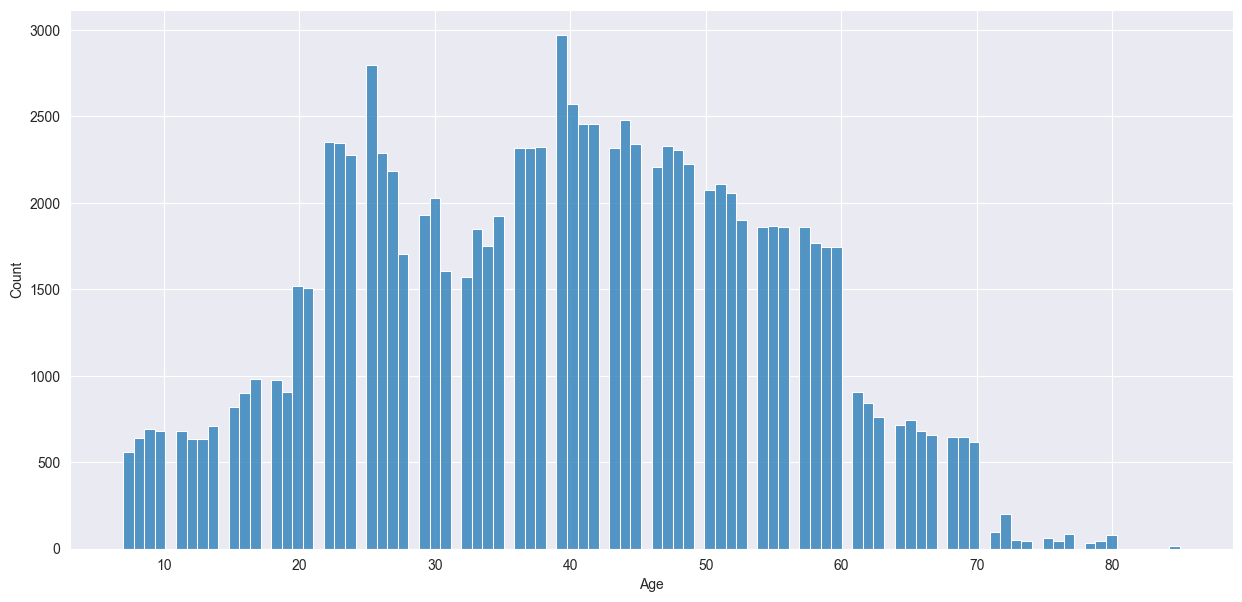

In [35]:
sns.histplot(data=df, x='Age', bins=100)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Count'>

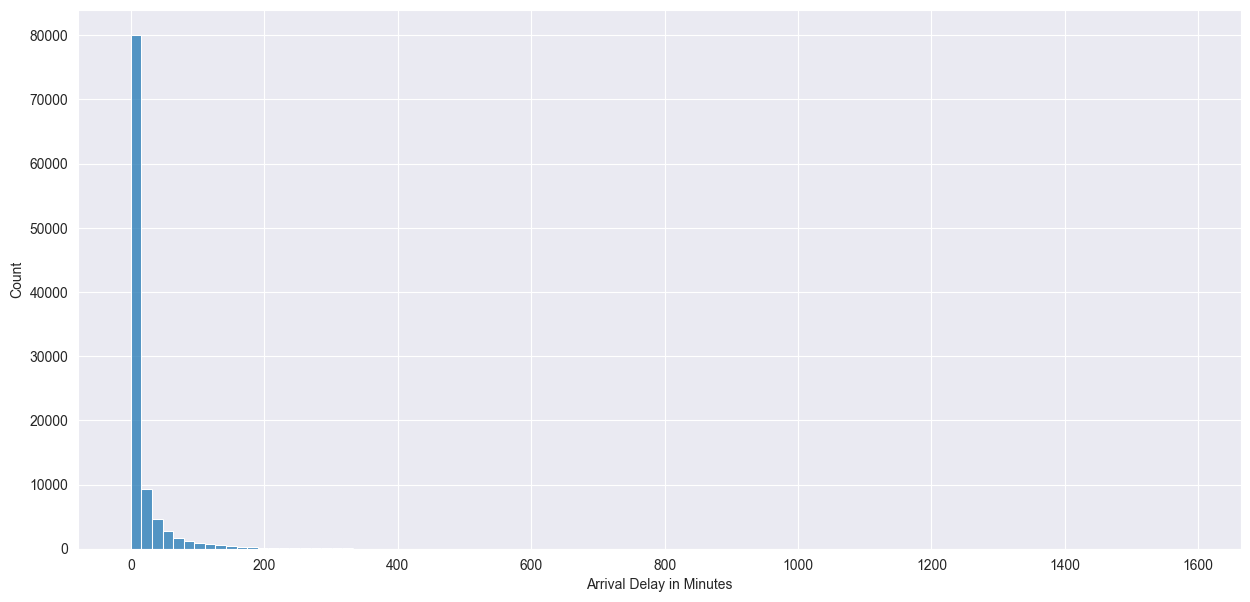

In [41]:
sns.histplot(data=df, x='Arrival Delay in Minutes', bins=100)

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Count'>

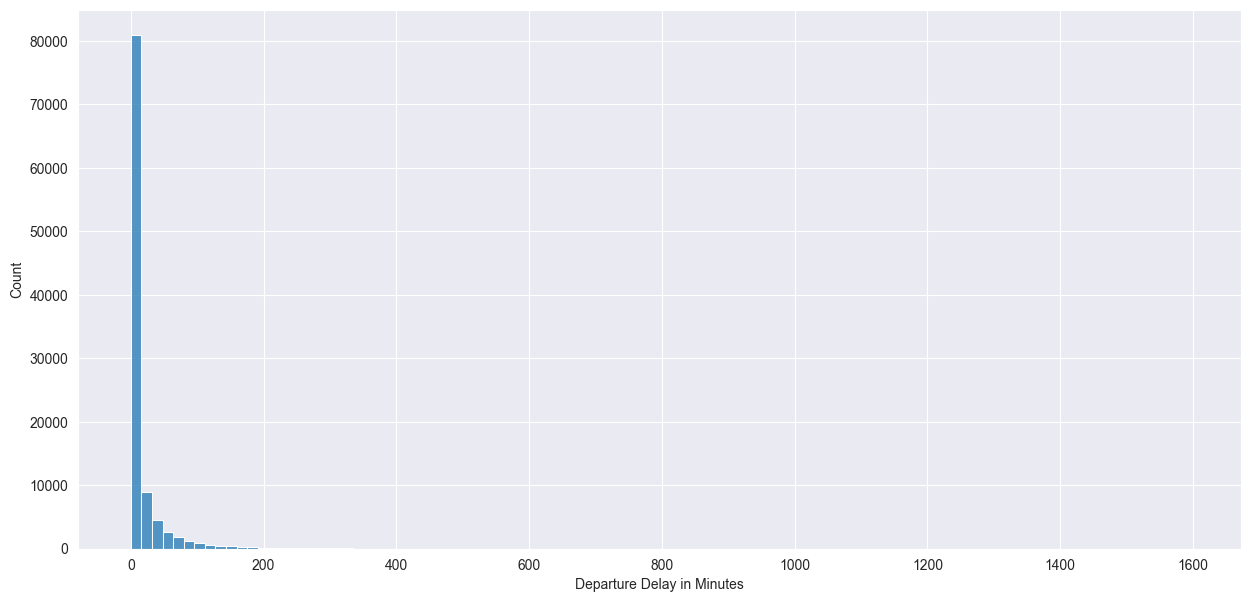

In [42]:
sns.histplot(data=df, x='Departure Delay in Minutes', bins=100)

## Szukanie zależności między atrybutami

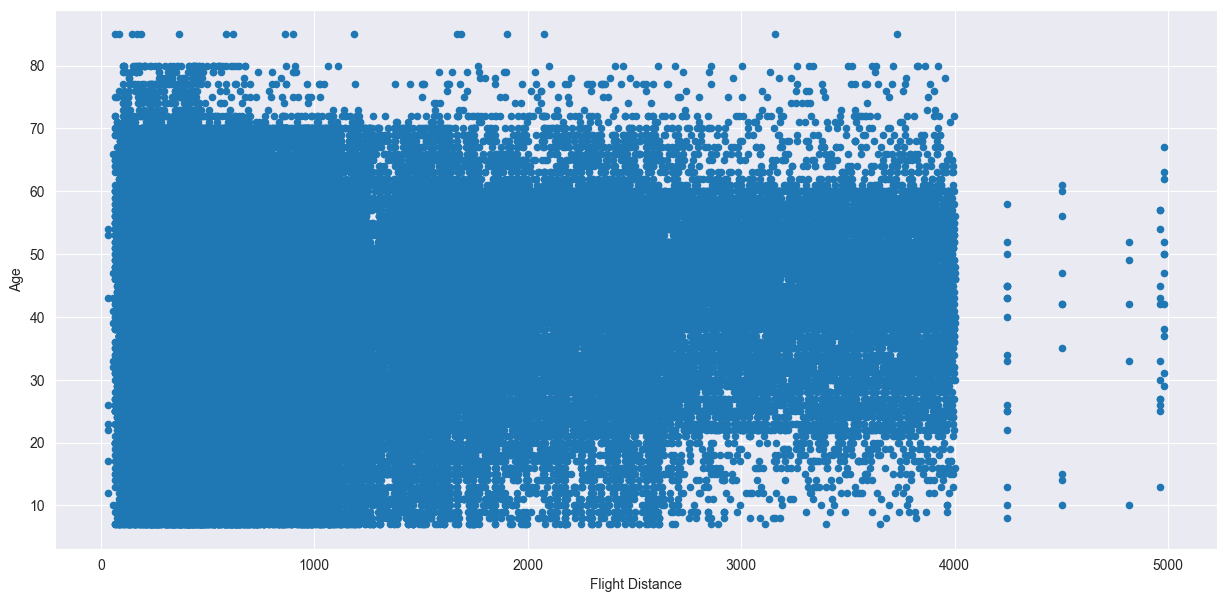

In [53]:
df1.plot(kind='scatter', x='Flight Distance', y='Age')
plt.show()

### Próbkowanie danych:
Dokonano próbkowania danych, wybierając co kilka wartość lub losowo wybierając podzbiór danych. Użyto metody sample() na ramce danych, aby wylosować określoną liczbę próbek

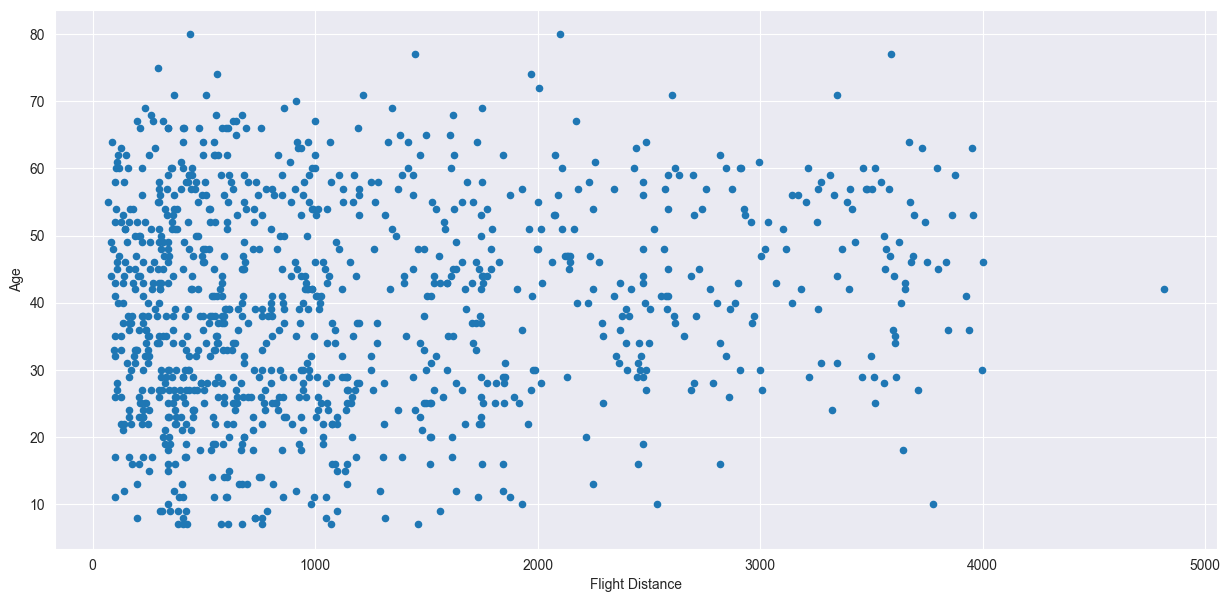

In [50]:
sampled_df = df1.sample(n=1000)  # Wylosuj 1000 próbek z ramki danych
sampled_df.plot(kind='scatter', x='Flight Distance', y='Age')
plt.show()

### Wykorzystanie agregacji:
Wykorzystano agregację, aby obliczyć statystyki, takie jak średnia, mediana, minimum lub maksimum dla różnych przedziałów wartości atrybutów:

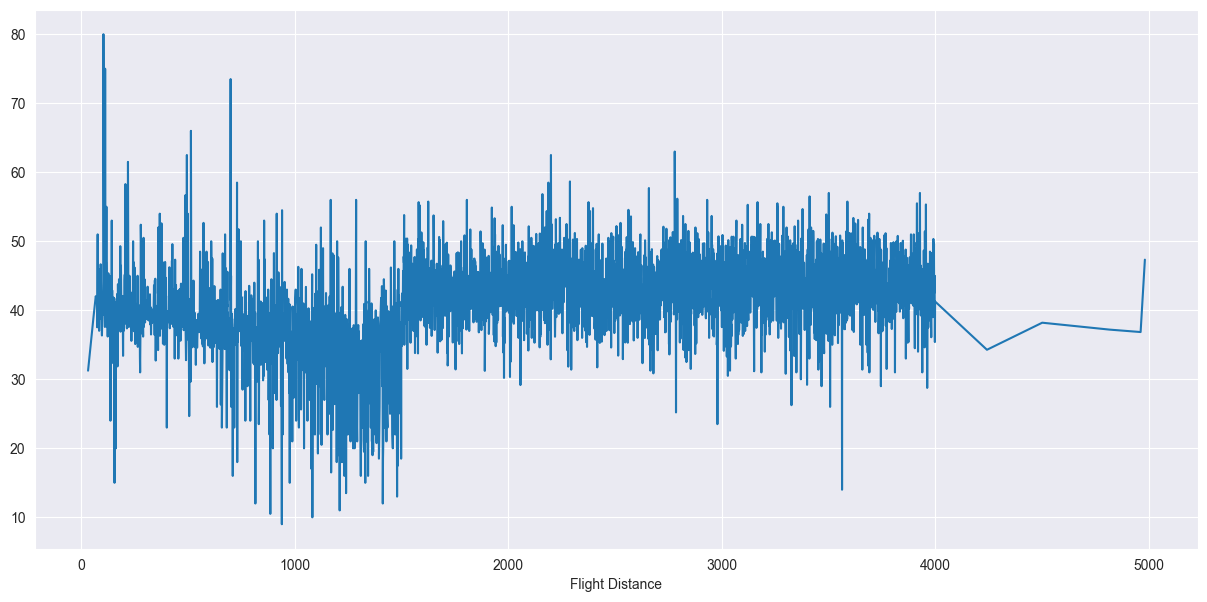

In [52]:
aggregated_df = df1.groupby('Flight Distance')['Age'].mean()  # Oblicz średnią dla każdej wartości Flight Distance
aggregated_df.plot(kind='line')
plt.show()

### Wykres gęstości:
Zamiast wykresu punktowego, wykorzystano wykres gęstości, który pokazuje rozkład wartości atrybutów:

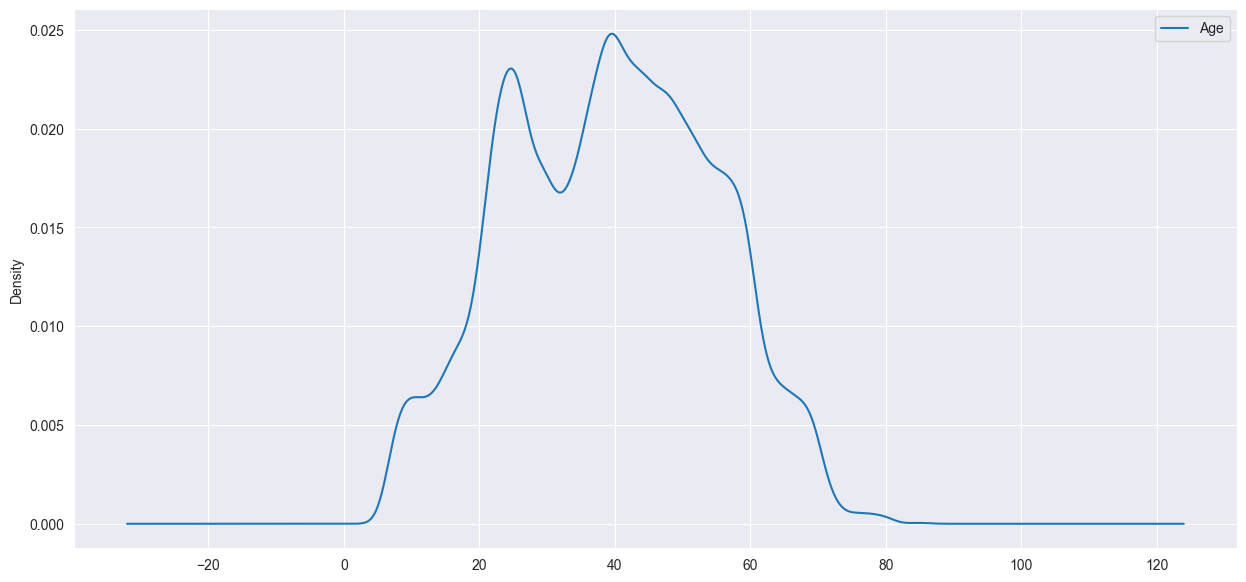

In [54]:
df1.plot(kind='density', x='Flight Distance', y='Age')
plt.show()

# MOZNA DODAC WIECEJ WYKRESOW

Bazujac na tym: https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb
i tym: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb


## Kodowanie zmiennych kategorycznych


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#### Przydatne linki
* [`miceforest`](https://pypi.org/project/miceforest/) - imputacja braków danych za pomocą modeli uczenia maszynowego
* [`pycircural`](https://towardsdatascience.com/introducing-pycircular-a-python-library-for-circular-data-analysis-bfd696a6a42b) - obsługa kodowania zmiennych cyklicznych
* [`feature-engine`](https://feature-engine.trainindata.com/en/latest/) - automatyzacja procesu przygotowywania danych